In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, ResNet50, VGG19
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD, Adam
from keras import regularizers
from keras.utils import np_utils

In [2]:
num_classes = 10

(imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste) = cifar10.load_data()

170508288/170498071 [==============================] - 24s 0us/step


In [3]:
identificacoes_treino = np_utils.to_categorical(identificacoes_treino, num_classes)
identificacoes_teste = np_utils.to_categorical(identificacoes_teste, num_classes)

In [4]:
nomes_classificacoes = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

In [5]:
imagens_treino = imagens_treino/255.0
imagens_teste = imagens_teste/255.0

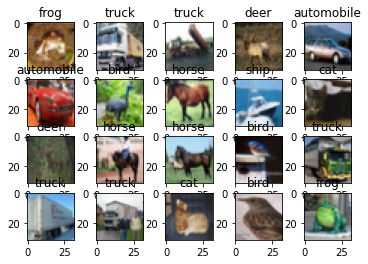

In [6]:
fig = plt.figure()
for imagem in range(20):
  plt.subplot(4, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[np.argmax(identificacoes_treino[imagem])])

In [7]:
vgg19 = VGG19(include_top=False, input_shape=(32, 32, 3))

80150528/80134624 [==============================] - 13s 0us/step


In [8]:
x = vgg19.output
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(500, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [9]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
batch_size = 125
epochs = 30

result = model.fit(imagens_treino, identificacoes_treino, batch_size=batch_size, epochs=epochs, validation_split=0.35, verbose=1)

Epoch 1/30
260/260 [==============================] - 2082s 8s/step - loss: 2.0020 - accuracy: 0.2029 - val_loss: 4.1303 - val_accuracy: 0.0992
Epoch 2/30
260/260 [==============================] - 1969s 8s/step - loss: 1.7551 - accuracy: 0.2749 - val_loss: 2.0531 - val_accuracy: 0.2821
Epoch 3/30
 79/260 [========>.....................] - ETA: 21:24 - loss: 1.6455 - accuracy: 0.3218

In [ ]:
score = model.evaluate(imagens_teste,identificacoes_teste, batch_size=batch_size)

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['treino', 'avaliação'])

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['treino', 'avaliação'])